In [1]:
# Introduction

# The data that I will be working with is from IBM and has information about employee attrition.
#I focused on attrition, distance from home, age, relationship satisfaction, year since last promotion, total working years, years with current manager, salary and department. 

In [2]:
# Hypothesis

# Ho: There is no statistical significance between employee well-being measurements and employee attrition. 
# Ha: There is a statistical significance between employee well-being measurements and employee attrition. 

In [3]:
#Data

#This data was obtained from Kaggle; it has 1470 observations and 35 variables. 
#This data is from IBM HR analytics.

In [4]:
# Set up environment

import math
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# Read the data
IBM_df = pd.read_csv(r"C:\Users\leonc\OneDrive\Documents\Thinkful\Datasets\IBM\ibm.csv")

In [6]:
# Get to know the data 
IBM_df.info()
pd.set_option('display.max_columns', None)
IBM_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
#look for null values
IBM_df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#look for null values
IBM_df.isnull().sum().sum()

0

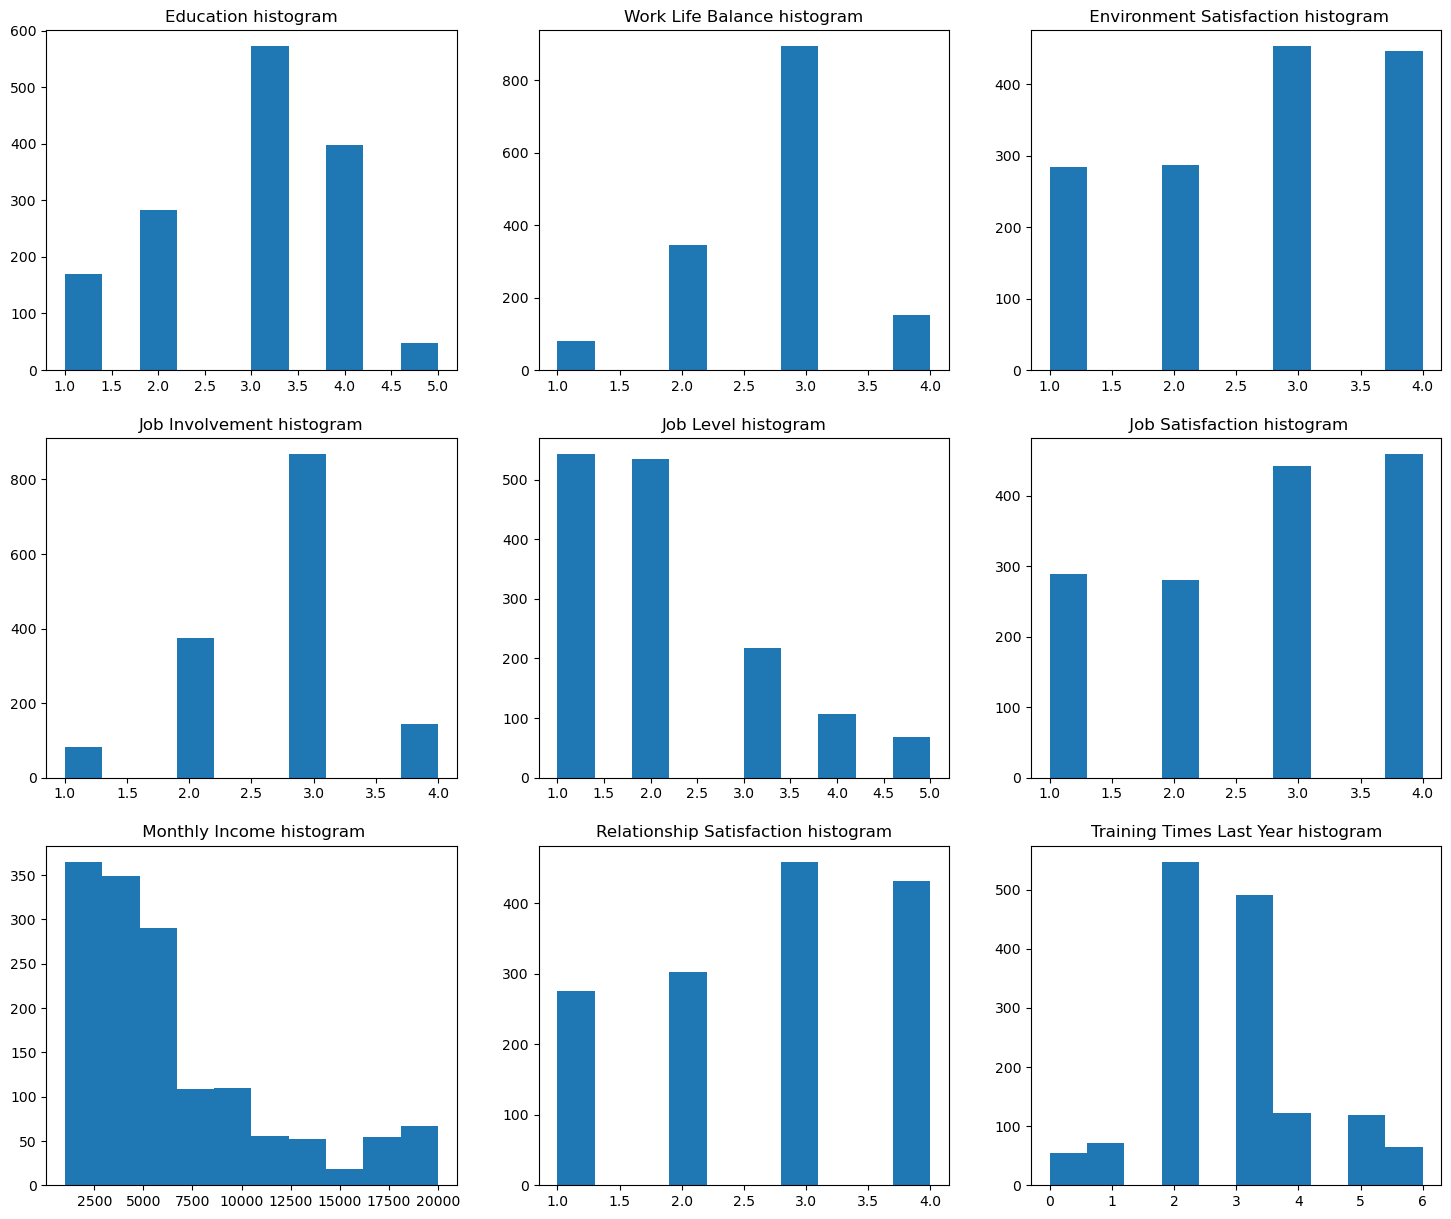

In [9]:
# Histograms to help understand the dataset
plt.figure(figsize=(18,15))

plt.subplot(3, 3, 1)
plt.hist(IBM_df["Education"])
plt.title("Education histogram")

plt.subplot(3, 3, 2)
plt.hist(IBM_df["WorkLifeBalance"])
plt.title("Work Life Balance histogram")

plt.subplot(3, 3, 3)
plt.hist(IBM_df["EnvironmentSatisfaction"])
plt.title(" Environment Satisfaction histogram")

plt.subplot(3, 3, 4)
plt.hist(IBM_df["JobInvolvement"])
plt.title("Job Involvement histogram")

plt.subplot(3, 3, 5)
plt.hist(IBM_df["JobLevel"])
plt.title("Job Level histogram")

plt.subplot(3, 3, 6)
plt.hist(IBM_df["JobSatisfaction"])
plt.title(" Job Satisfaction histogram")

plt.subplot(3, 3, 7)
plt.hist(IBM_df["MonthlyIncome"])
plt.title(" Monthly Income histogram")

plt.subplot(3, 3, 8)
plt.hist(IBM_df["RelationshipSatisfaction"])
plt.title("Relationship Satisfaction histogram")

plt.subplot(3, 3, 9)
plt.hist(IBM_df["TrainingTimesLastYear"])
plt.title("Training Times Last Year histogram")


plt.show()

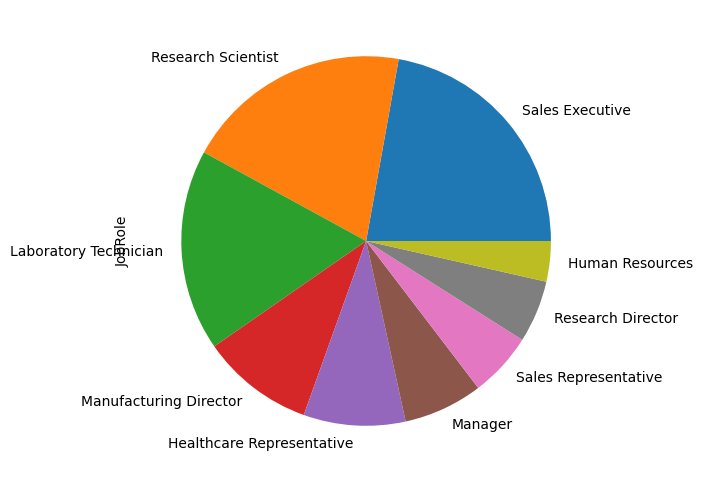

In [10]:
#pie chart to show people working in different departments
IBM_df['JobRole'].value_counts().plot(kind='pie',figsize=(6,6));

In [11]:
IBM_df['JobRole'].value_counts() 


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [12]:
department_values = IBM_df['JobRole'].unique()
print("JobRole Values:", department_values)

JobRole Values: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


In [13]:
IBM_df.value_counts('StandardHours')

StandardHours
80    1470
dtype: int64

In [14]:
IBM_df.value_counts('JobLevel')

JobLevel
1    543
2    534
3    218
4    106
5     69
dtype: int64

<Axes: ylabel='Gender'>

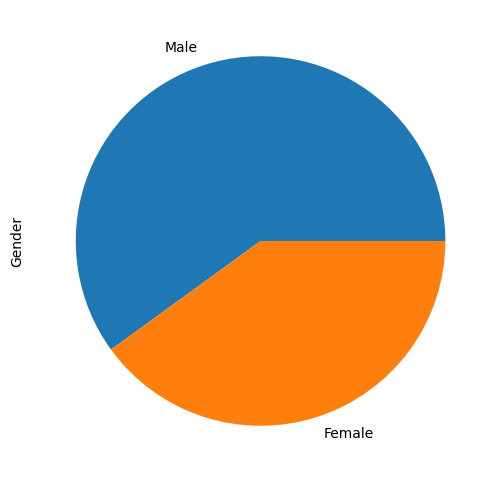

In [15]:
IBM_df['Gender'].value_counts().plot(kind='pie',figsize=(6,6))

<Axes: ylabel='BusinessTravel'>

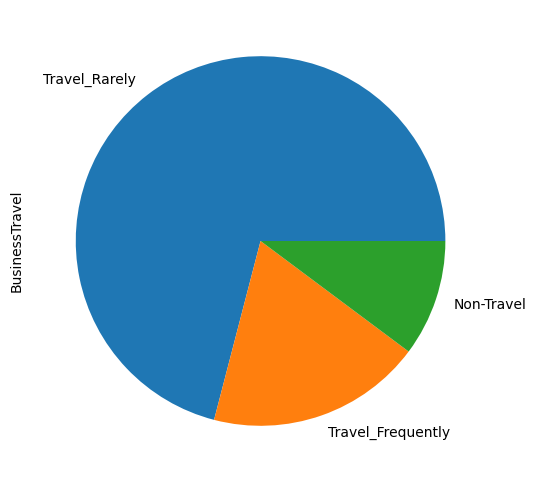

In [16]:
IBM_df['BusinessTravel'].value_counts().plot(kind='pie',figsize=(6,6))

<Axes: ylabel='Attrition'>

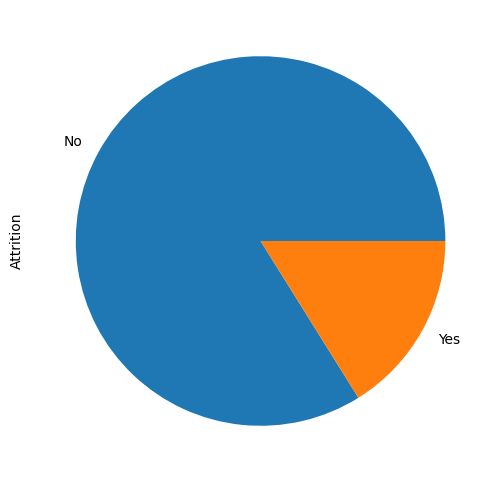

In [17]:
IBM_df['Attrition'].value_counts().plot(kind='pie',figsize=(6,6))

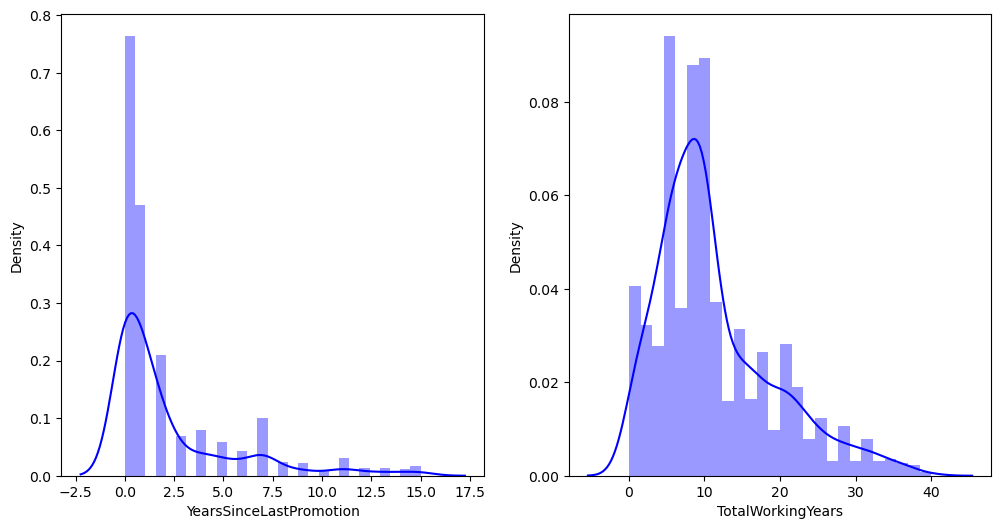

In [18]:
# create distribution plot
Fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(ax = axes[0],color = "Blue",a=IBM_df['YearsSinceLastPromotion'])
sns.distplot(ax = axes[1],color = "Blue",a=IBM_df["TotalWorkingYears"]);


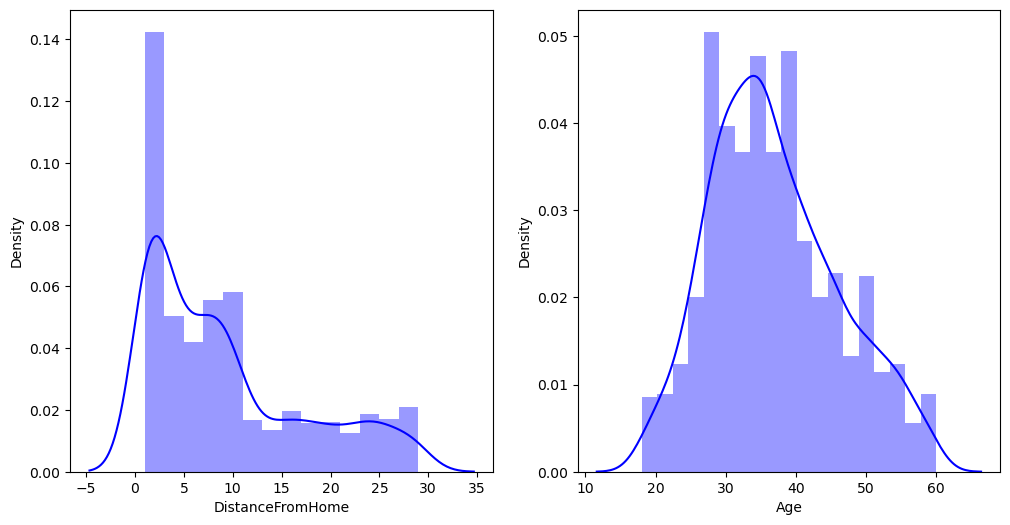

In [19]:
Fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(ax = axes[0],color = "Blue",a=IBM_df['DistanceFromHome'])
sns.distplot(ax = axes[1],color = "Blue",a=IBM_df["Age"]);

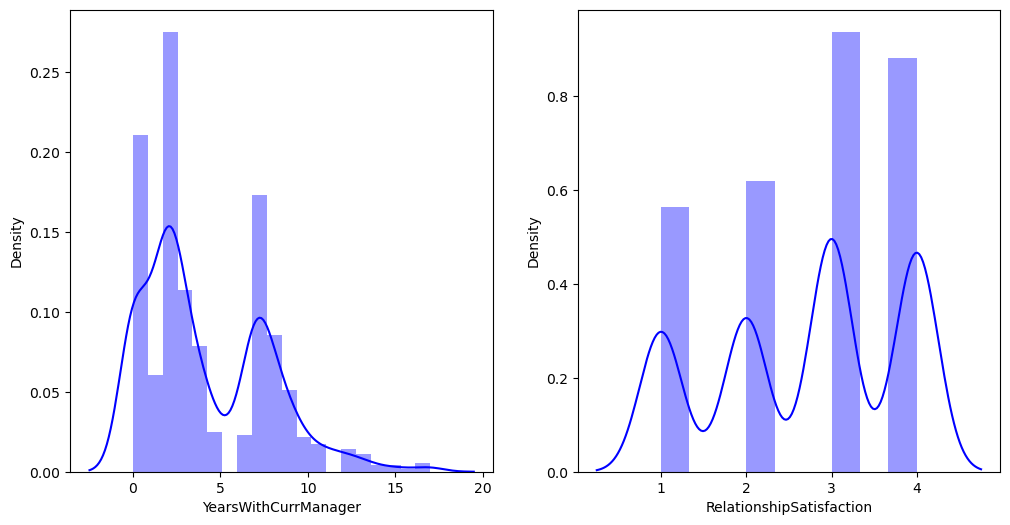

In [20]:
Fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(ax = axes[0],color = "Blue",a=IBM_df['YearsWithCurrManager'])
sns.distplot(ax = axes[1],color = "Blue",a=IBM_df["RelationshipSatisfaction"]);


In [21]:
# Split up the dataset
attrition_yes = IBM_df[(IBM_df['Attrition'] == 'Yes')]
attrition_yes.info()

attrition_no =  IBM_df[(IBM_df['Attrition'] ==  'No')]
attrition_no.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 1461
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       237 non-null    int64 
 1   Attrition                 237 non-null    object
 2   BusinessTravel            237 non-null    object
 3   DailyRate                 237 non-null    int64 
 4   Department                237 non-null    object
 5   DistanceFromHome          237 non-null    int64 
 6   Education                 237 non-null    int64 
 7   EducationField            237 non-null    object
 8   EmployeeCount             237 non-null    int64 
 9   EmployeeNumber            237 non-null    int64 
 10  EnvironmentSatisfaction   237 non-null    int64 
 11  Gender                    237 non-null    object
 12  HourlyRate                237 non-null    int64 
 13  JobInvolvement            237 non-null    int64 
 14  JobLevel                 

Text(0, 0.5, 'Number of occurrences')

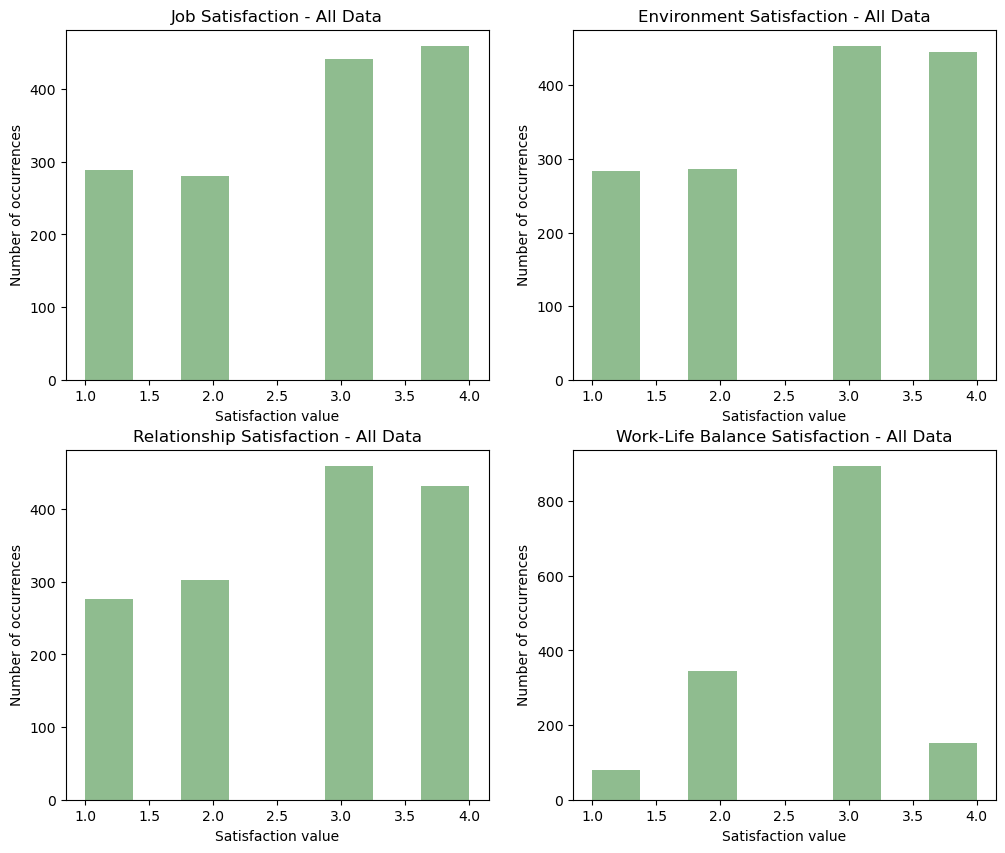

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for Relationship Satisfaction
axs[1, 0].hist(IBM_df['RelationshipSatisfaction'], bins=8, color='darkseagreen')
axs[1, 0].set_title("Relationship Satisfaction - All Data")
axs[1, 0].set_xlabel("Satisfaction value")
axs[1, 0].set_ylabel("Number of occurrences")

# Plot for Environment Satisfaction
axs[0, 1].hist(IBM_df['EnvironmentSatisfaction'], bins=8, color='darkseagreen')
axs[0, 1].set_title("Environment Satisfaction - All Data")
axs[0, 1].set_xlabel("Satisfaction value")
axs[0, 1].set_ylabel("Number of occurrences")

# Plot for Job Satisfaction
axs[0, 0].hist(IBM_df['JobSatisfaction'], bins=8, color='darkseagreen')
axs[0, 0].set_title("Job Satisfaction - All Data")
axs[0, 0].set_xlabel("Satisfaction value")
axs[0, 0].set_ylabel("Number of occurrences")

# Plot for Work-Life Balance Satisfaction
axs[1, 1].hist(IBM_df['WorkLifeBalance'], bins=8, color='darkseagreen')
axs[1, 1].set_title("Work-Life Balance Satisfaction - All Data")
axs[1, 1].set_xlabel("Satisfaction value")
axs[1, 1].set_ylabel("Number of occurrences")

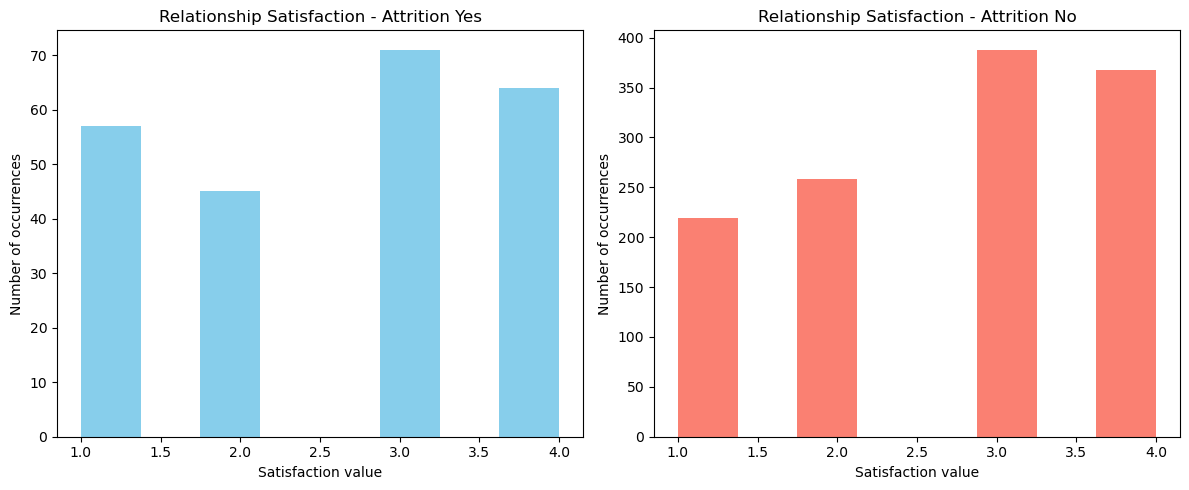

In [23]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Attrition_yes
axs[0].hist(attrition_yes.RelationshipSatisfaction, bins=8, color='skyblue')
axs[0].set_title("Relationship Satisfaction - Attrition Yes")
axs[0].set_xlabel("Satisfaction value")
axs[0].set_ylabel("Number of occurrences")

# Plot for Attrition_no
axs[1].hist(attrition_no.RelationshipSatisfaction, bins=8, color='salmon')
axs[1].set_title("Relationship Satisfaction - Attrition No")
axs[1].set_xlabel("Satisfaction value")
axs[1].set_ylabel("Number of occurrences")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

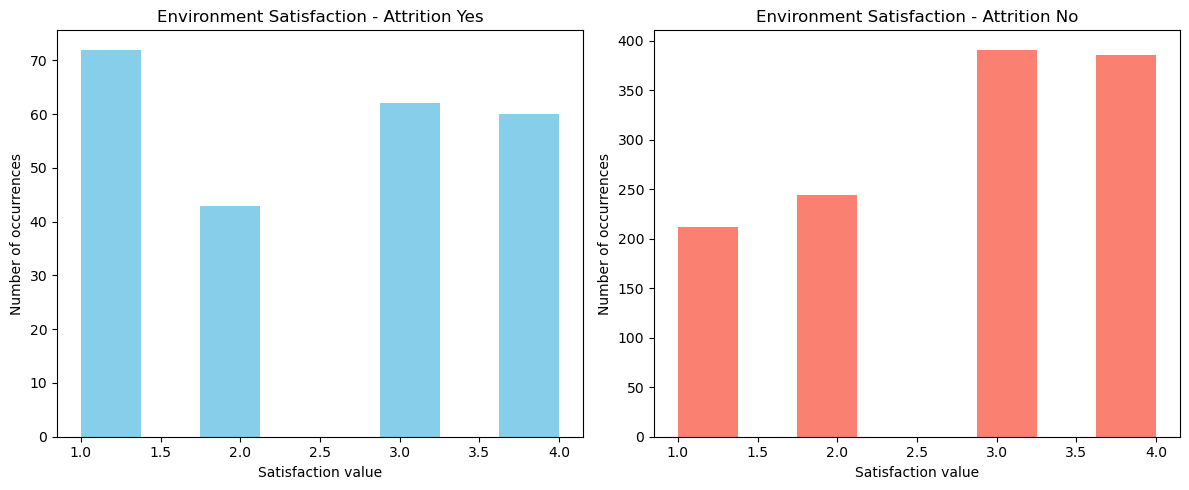

In [24]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Attrition_yes
axs[0].hist(attrition_yes.EnvironmentSatisfaction, bins=8, color='skyblue')
axs[0].set_title("Environment Satisfaction - Attrition Yes")
axs[0].set_xlabel("Satisfaction value")
axs[0].set_ylabel("Number of occurrences")

# Plot for Attrition_no
axs[1].hist(attrition_no.EnvironmentSatisfaction, bins=8, color='salmon')
axs[1].set_title("Environment Satisfaction - Attrition No")
axs[1].set_xlabel("Satisfaction value")
axs[1].set_ylabel("Number of occurrences")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

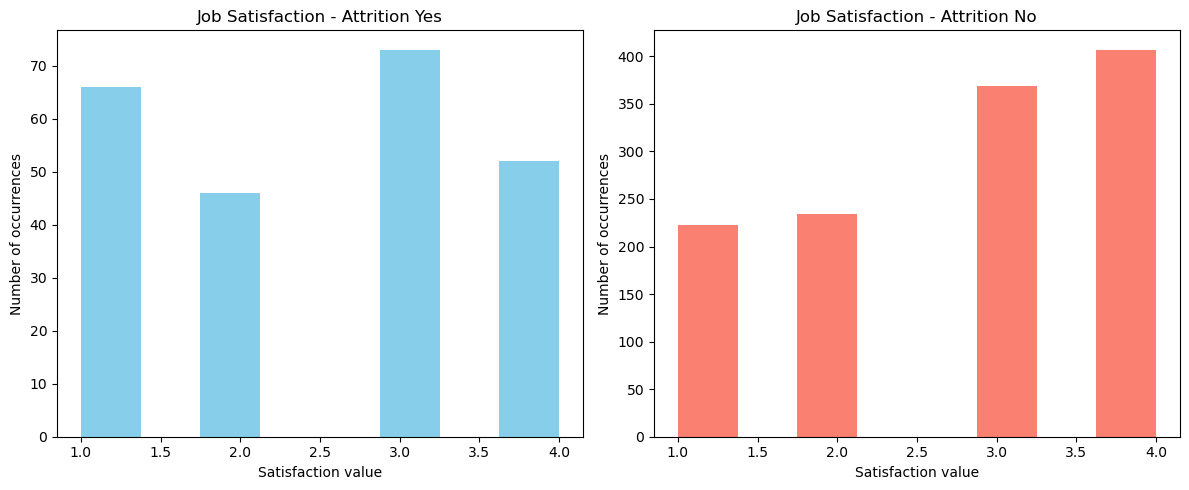

In [25]:


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Attrition_yes
axs[0].hist(attrition_yes.JobSatisfaction, bins=8, color='skyblue')
axs[0].set_title("Job Satisfaction - Attrition Yes")
axs[0].set_xlabel("Satisfaction value")
axs[0].set_ylabel("Number of occurrences")

# Plot for Attrition_no
axs[1].hist(attrition_no.JobSatisfaction, bins=8, color='salmon')
axs[1].set_title("Job Satisfaction - Attrition No")
axs[1].set_xlabel("Satisfaction value")
axs[1].set_ylabel("Number of occurrences")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

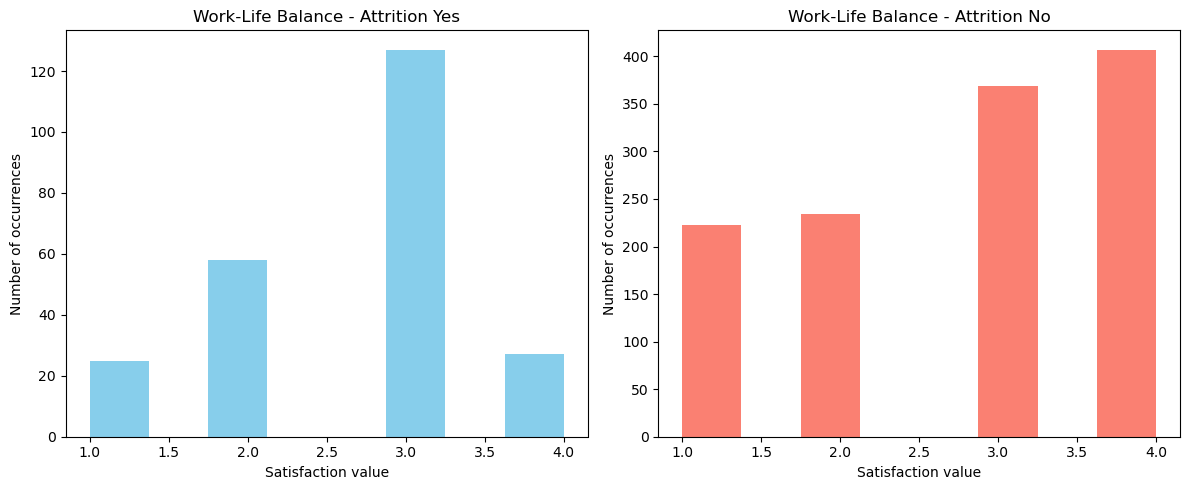

In [26]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Attrition_yes
axs[0].hist(attrition_yes.WorkLifeBalance, bins=8, color='skyblue')
axs[0].set_title("Work-Life Balance - Attrition Yes")
axs[0].set_xlabel("Satisfaction value")
axs[0].set_ylabel("Number of occurrences")

# Plot for Attrition_no
axs[1].hist(attrition_no.JobSatisfaction, bins=8, color='salmon')
axs[1].set_title("Work-Life Balance - Attrition No")
axs[1].set_xlabel("Satisfaction value")
axs[1].set_ylabel("Number of occurrences")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [27]:
IBM_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


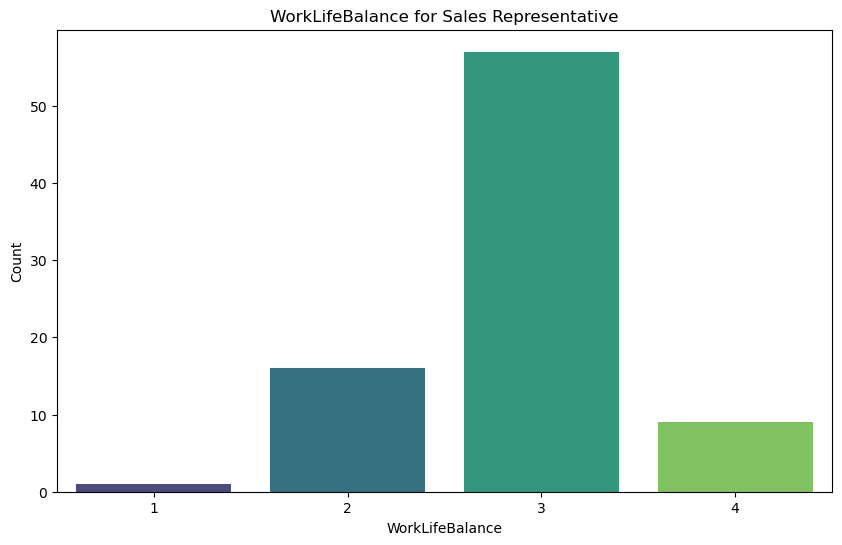

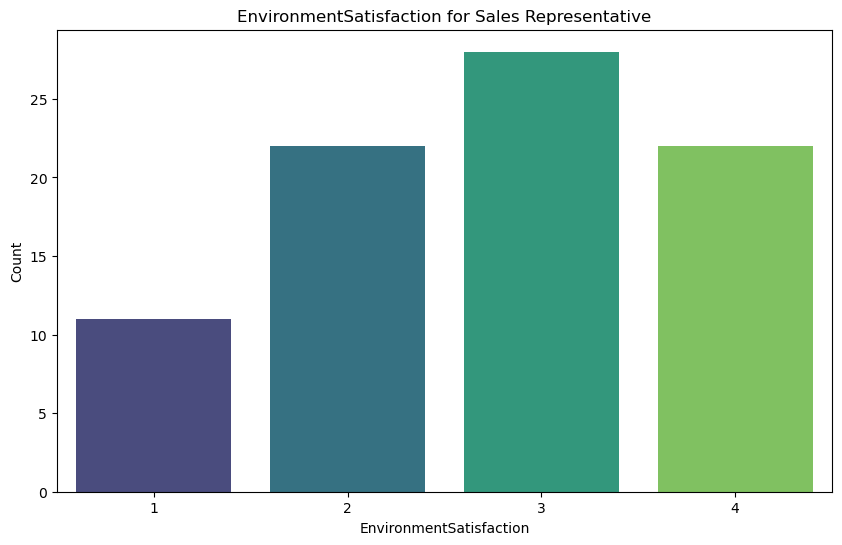

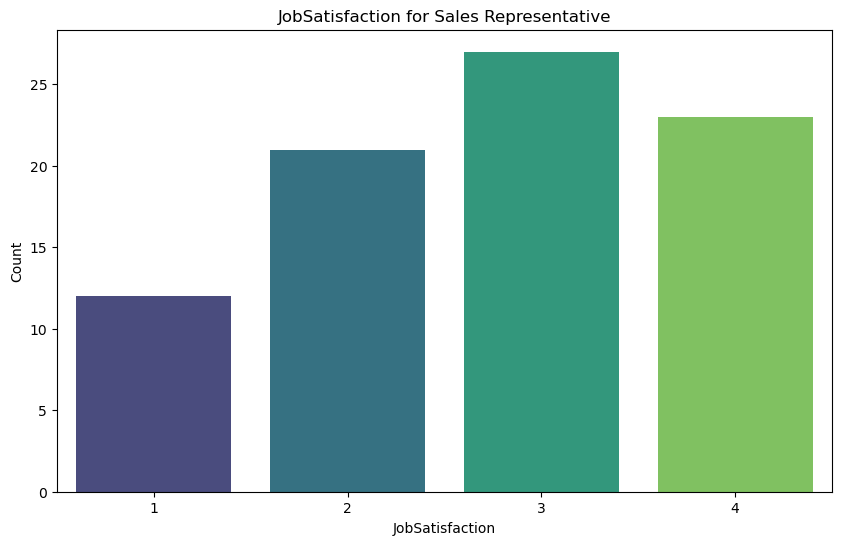

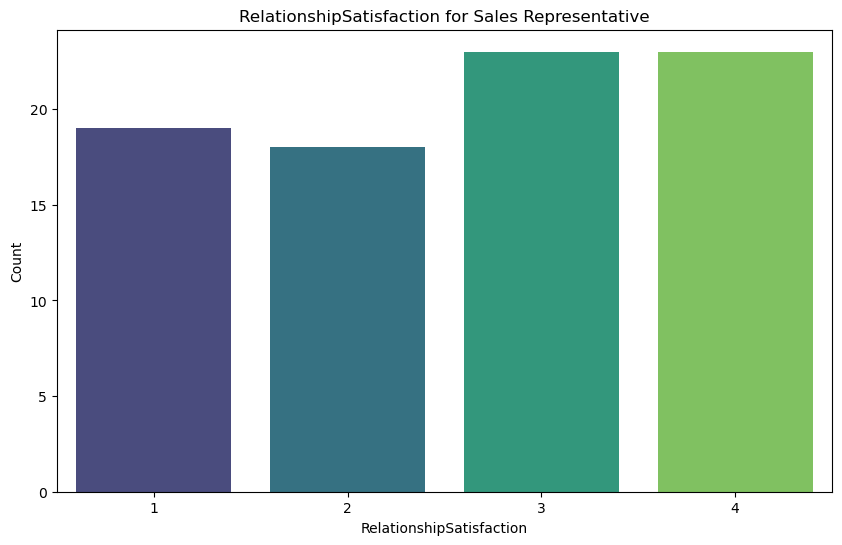

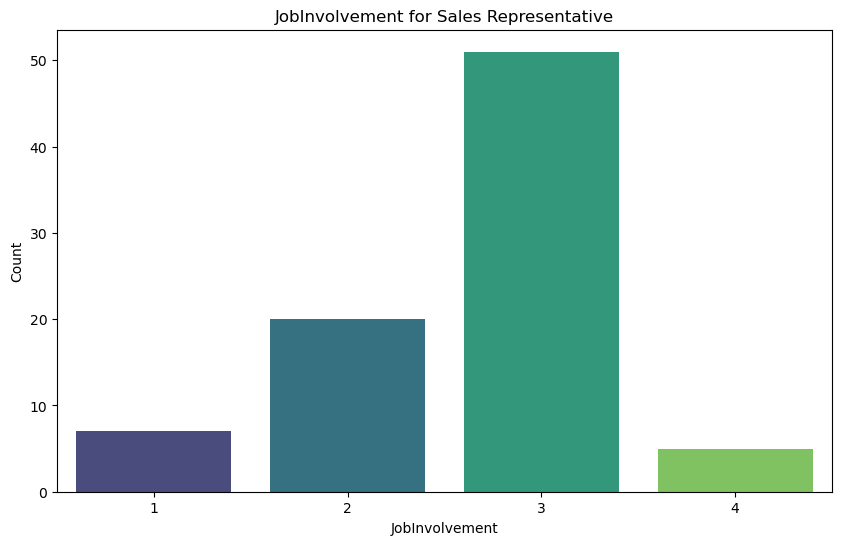

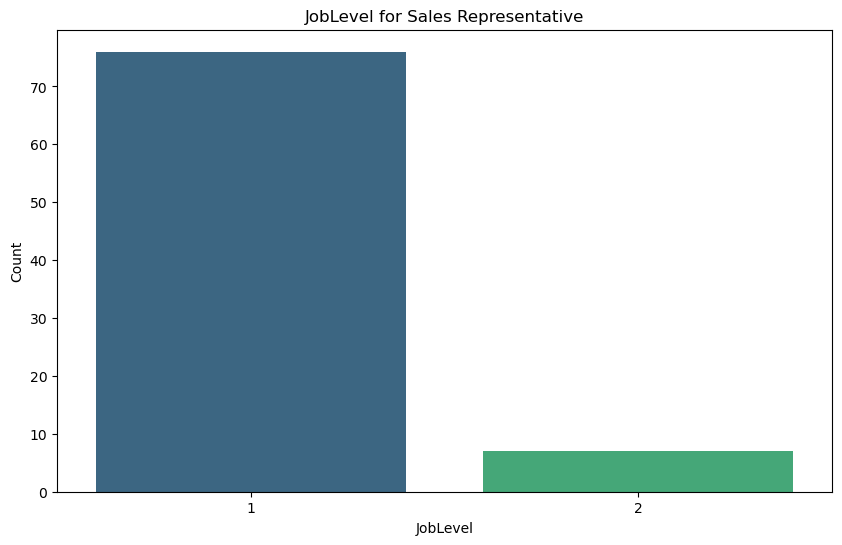

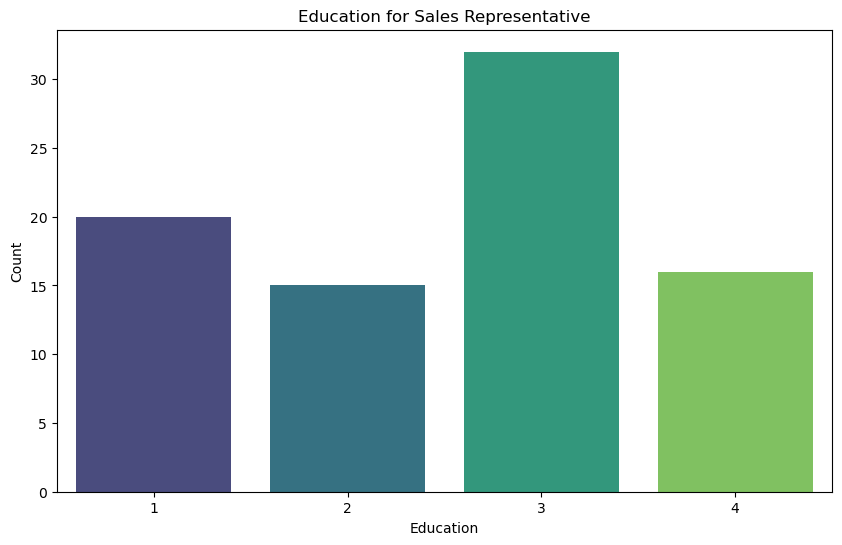

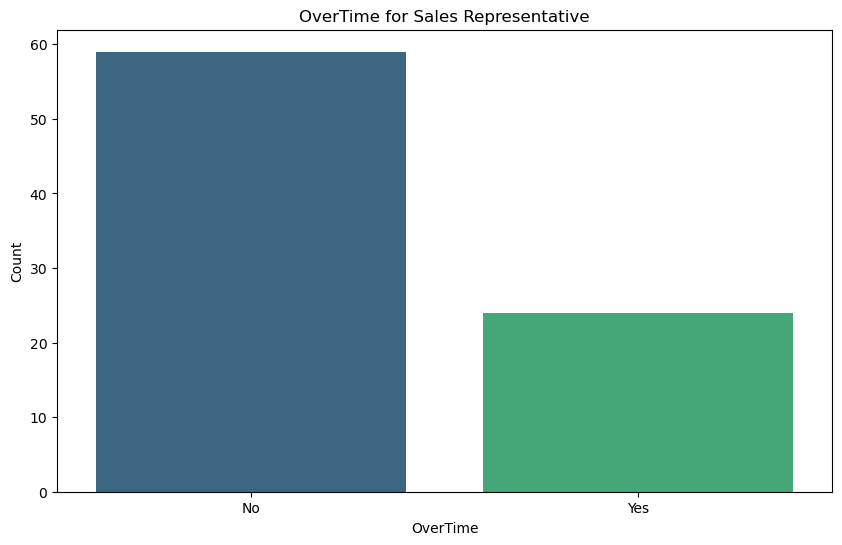

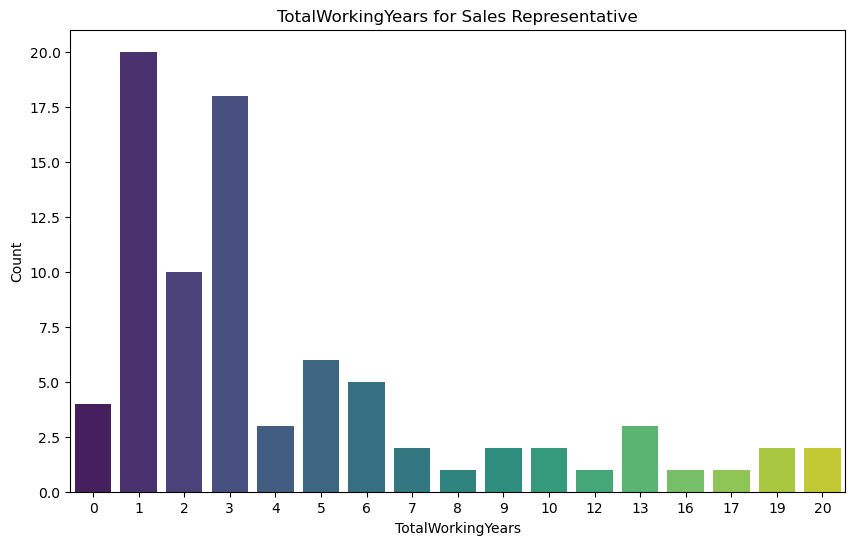

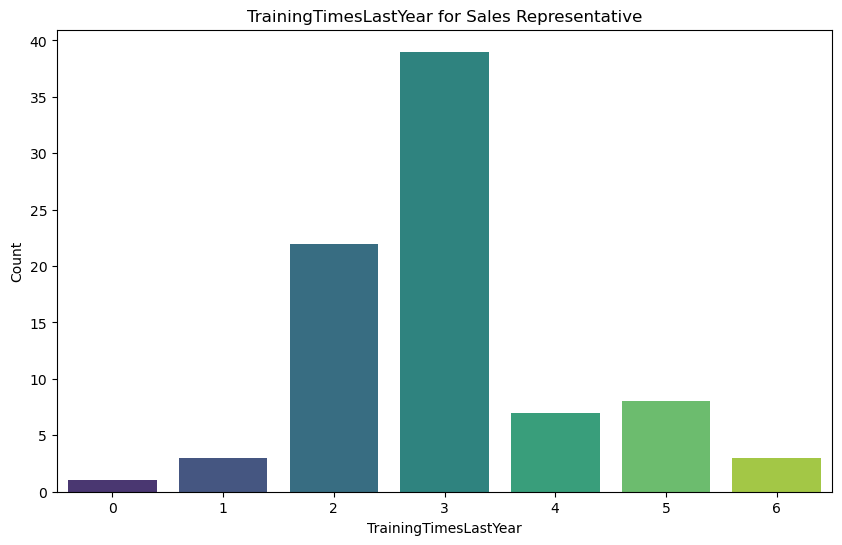

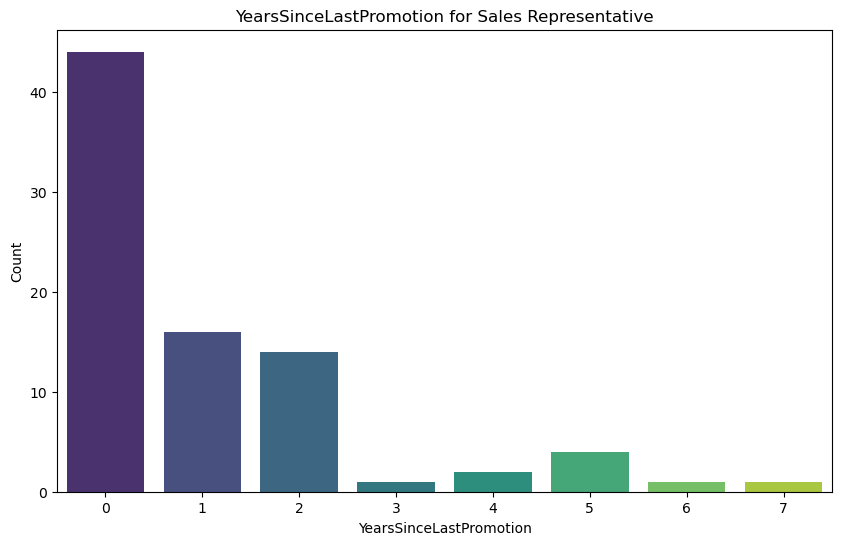

In [28]:
# Assuming Sales_data is a subset of IBM_df containing Sales Representatives
Sales_data = IBM_df[IBM_df['JobRole'] == 'Sales Representative']

# List of variables
variables = ['WorkLifeBalance', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'JobInvolvement',
             'JobLevel', 'Education', 'OverTime', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsSinceLastPromotion']

# Loop through each variable and create a bar chart
for variable in variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=variable, data=Sales_data, palette='viridis')
    plt.title(f'{variable} for Sales Representative')
    plt.xlabel(f'{variable}')
    plt.ylabel('Count')
    plt.show()

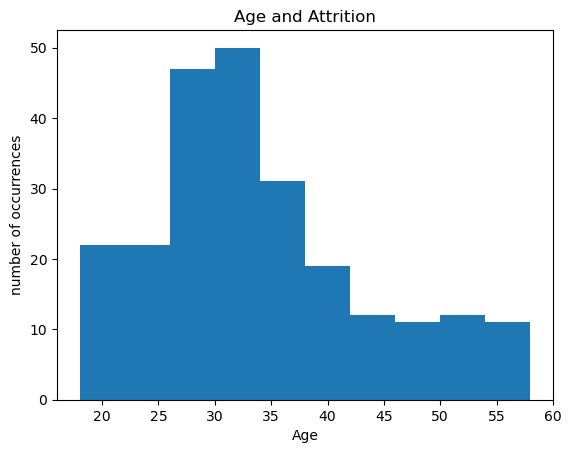

In [29]:
plt.hist(attrition_yes.Age)
plt.title("Age and Attrition")
plt.xlabel("Age")
plt.ylabel("number of occurrences")
plt.show()

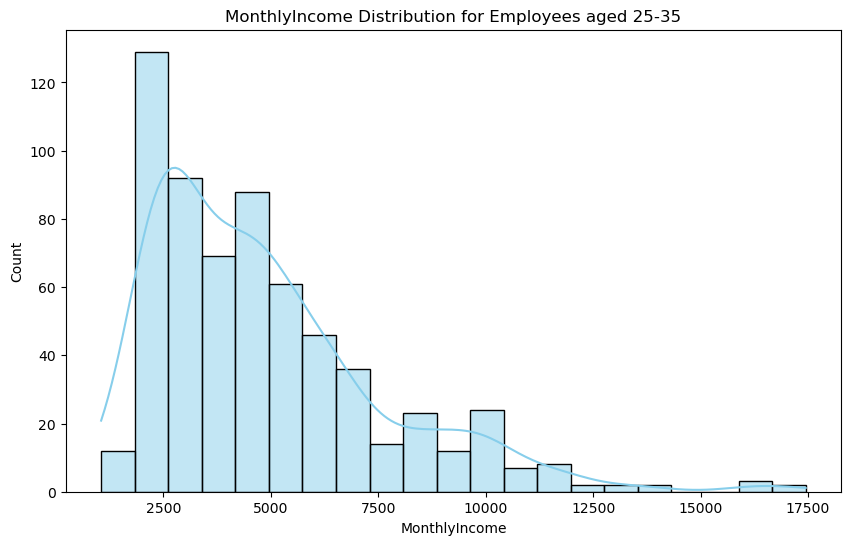

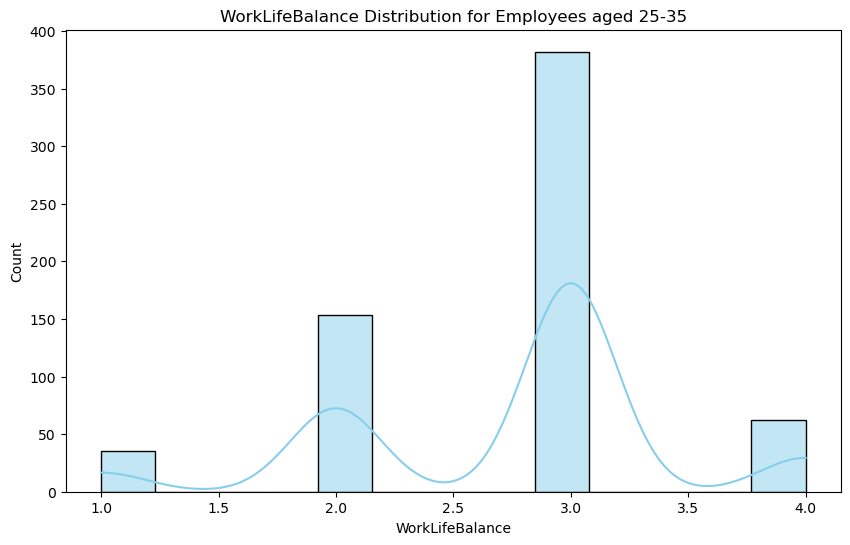

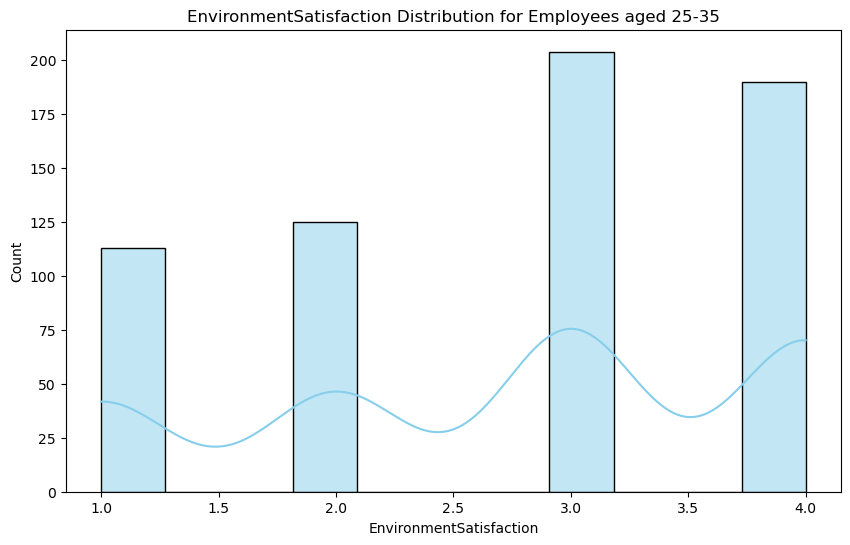

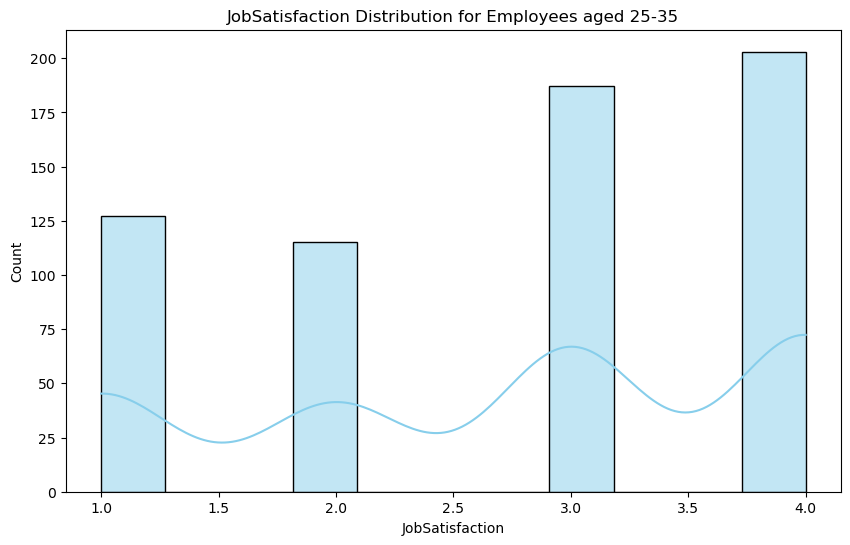

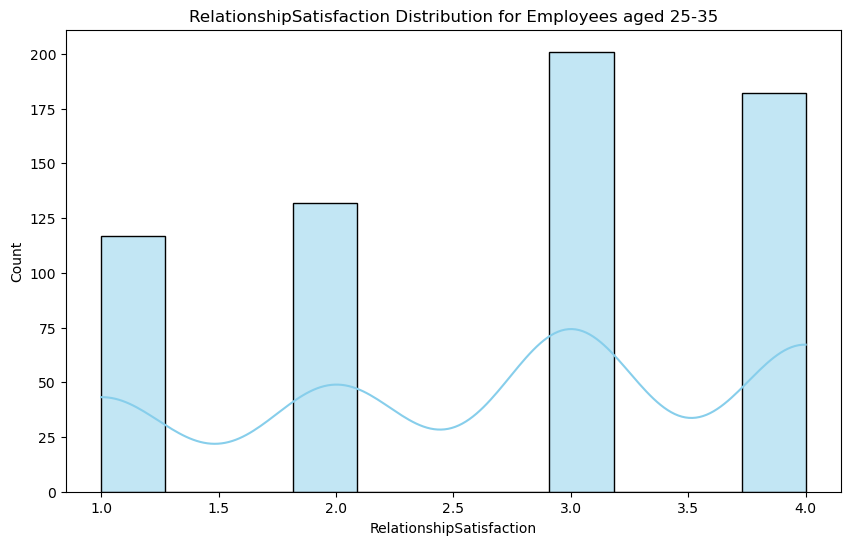

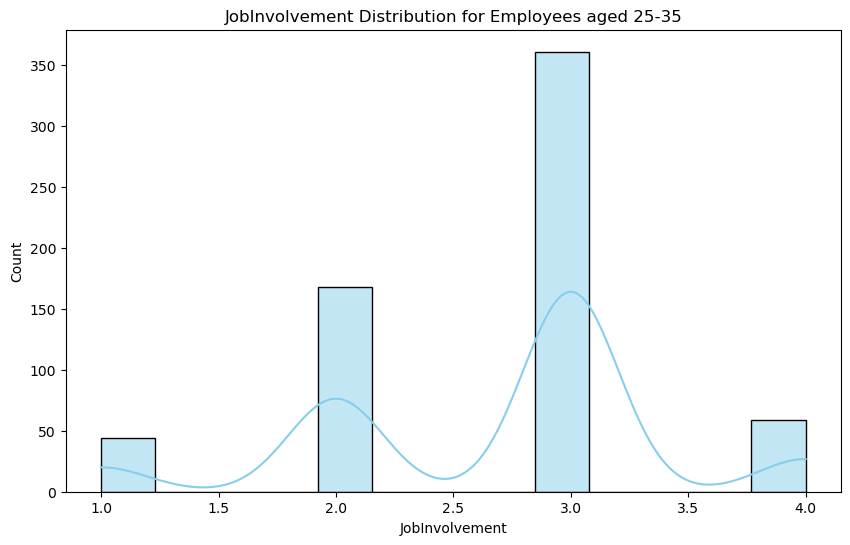

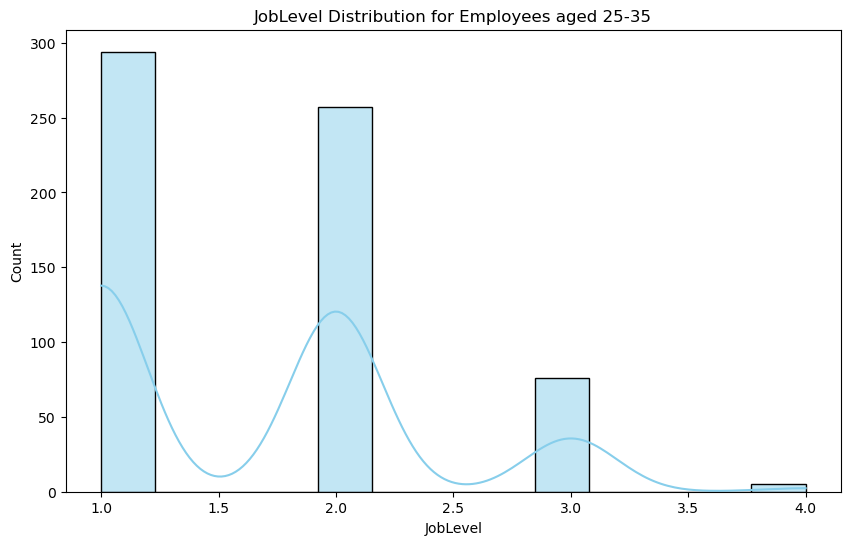

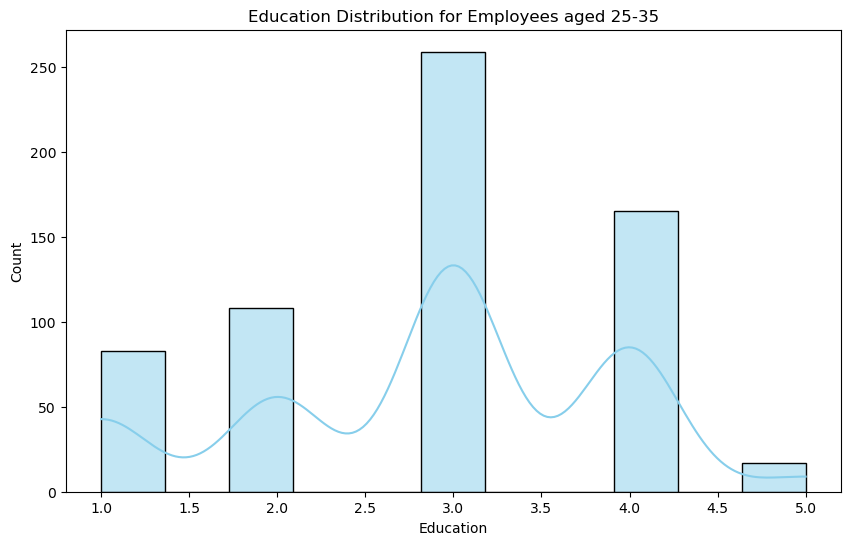

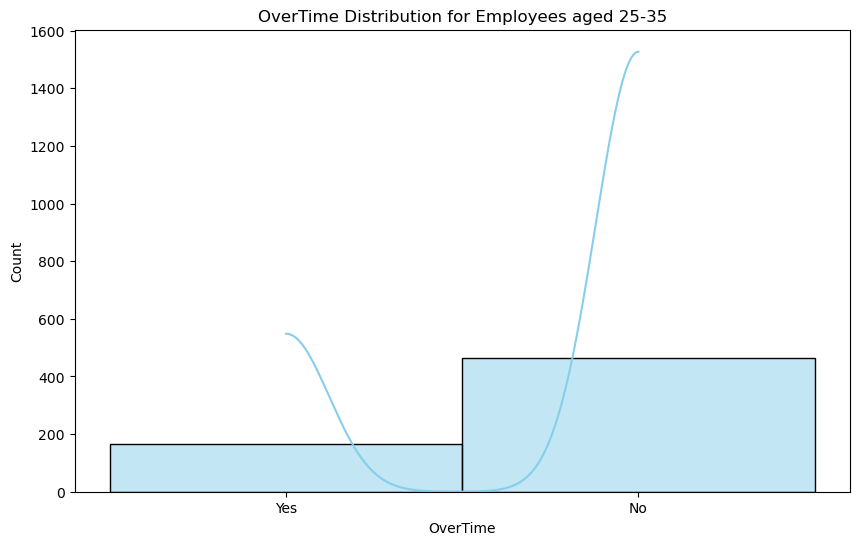

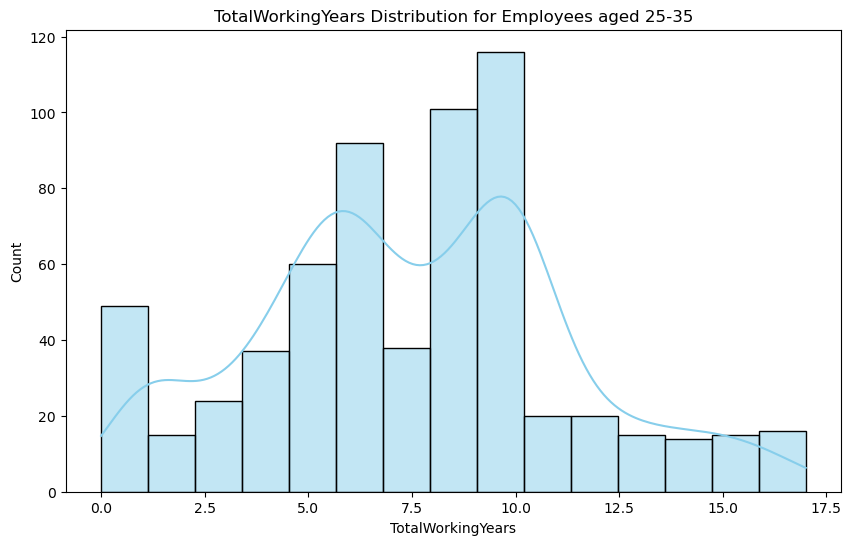

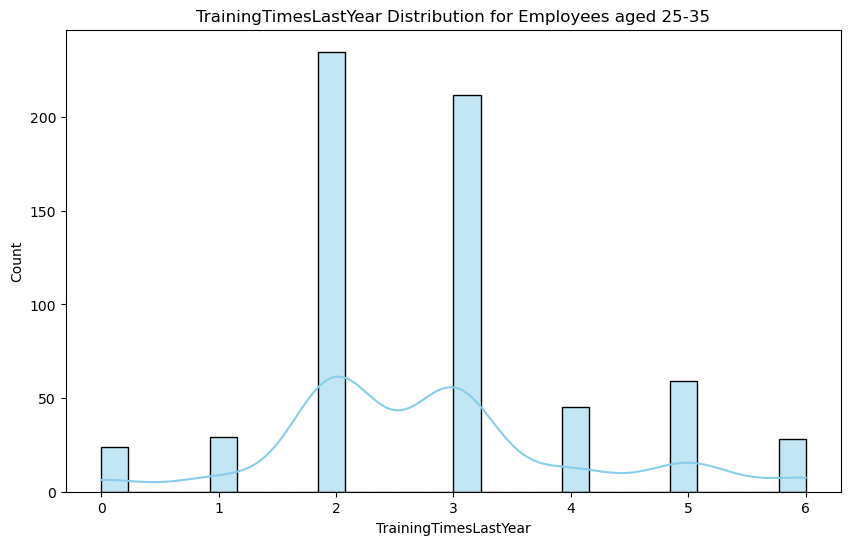

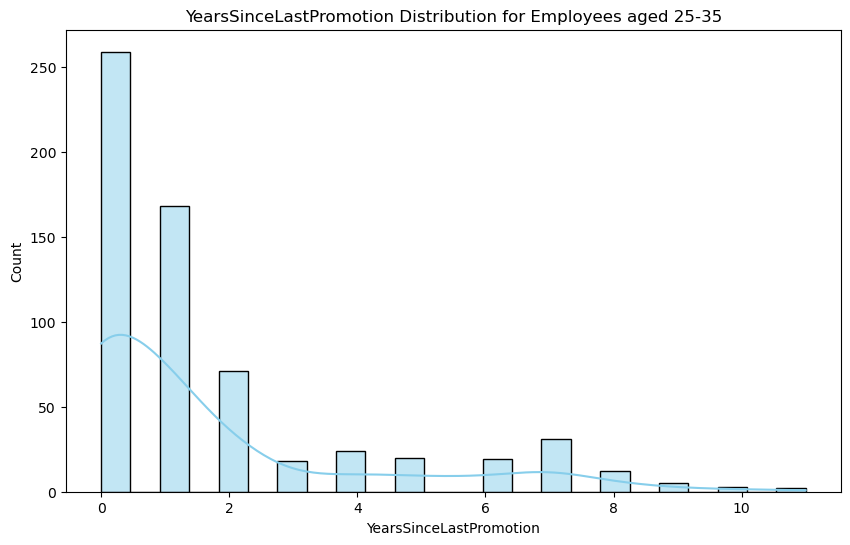

In [30]:
# Filter the data for employees aged 25 to 35
age_25_to_35 = IBM_df[(IBM_df['Age'] >= 25) & (IBM_df['Age'] <= 35)]

# List of features
features = ['MonthlyIncome','WorkLifeBalance', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'JobInvolvement',
             'JobLevel', 'Education', 'OverTime', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsSinceLastPromotion']

# Plot histograms for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(age_25_to_35[feature], kde=True, color='skyblue')
    plt.title(f'{feature} Distribution for Employees aged 25-35')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [31]:
total_department_percentage=(attrition_yes['JobRole'].value_counts()/IBM_df['JobRole'].value_counts()*100).sum()

In [32]:
total_department_percentage

141.5234776634566

In [33]:
(attrition_yes['JobRole'].value_counts()/IBM_df['JobRole'].value_counts()*100)/total_department_percentage

Healthcare Representative    0.048545
Human Resources              0.163061
Laboratory Technician        0.169147
Manager                      0.034637
Manufacturing Director       0.048731
Research Director            0.017665
Research Scientist           0.113733
Sales Executive              0.123546
Sales Representative         0.280936
Name: JobRole, dtype: float64

<Axes: ylabel='JobRole'>

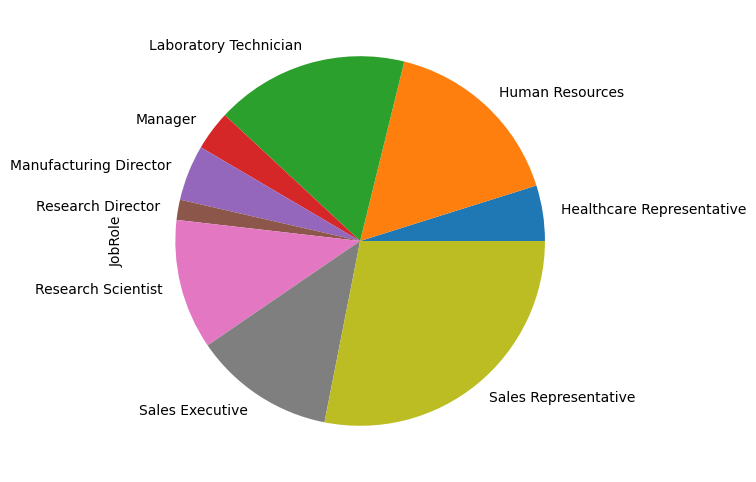

In [34]:
(attrition_yes['JobRole'].value_counts()/IBM_df['JobRole'].value_counts()).plot(kind='pie',figsize=(6,6))

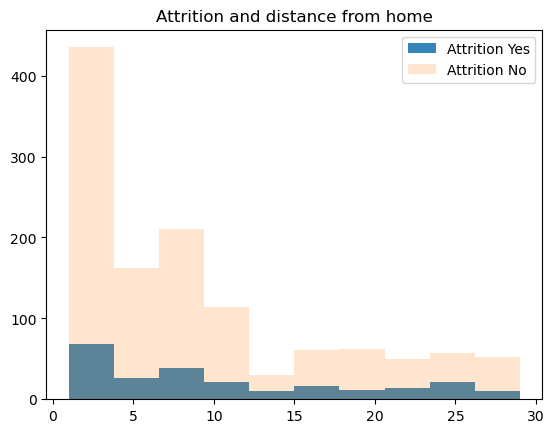

DescribeResult(nobs=237, minmax=(1, 29), mean=10.632911392405063, variance=71.44518343703068, skewness=0.6318715334830777, kurtosis=-0.8674734233081853)


Ttest_indResult(statistic=2.994708098265125, pvalue=0.0027930600802134266)

In [35]:
# plot histogram
plt.hist(attrition_yes['DistanceFromHome'], alpha = .9, label = "Attrition Yes")
plt.hist(attrition_no ['DistanceFromHome'], alpha = .2, label = "Attrition No")
plt.legend(loc="upper right")
plt.title("Attrition and distance from home")
plt.show()

# Descriptive statistics and T-test
print(stats.describe(attrition_yes['DistanceFromHome']))
stats.ttest_ind(attrition_yes['DistanceFromHome'], attrition_no['DistanceFromHome'])

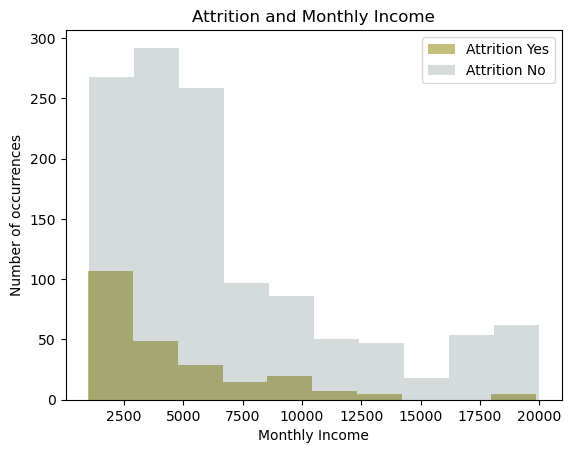

DescribeResult(nobs=237, minmax=(1009, 19859), mean=4787.0928270042195, variance=13251131.516770363, skewness=1.908966310070742, kurtosis=4.068929804278029)


Ttest_indResult(statistic=-6.203935765608938, pvalue=7.14736398535381e-10)

In [36]:

#Assuming you have a DataFrame named attrition_yes and attrition_no
# Customize the colors 
color_yes = 'DarkKhaki'
color_no = 'DarkSlateGrey'

# Plot histogram with different colors
plt.hist(attrition_yes['MonthlyIncome'], alpha=0.9, label="Attrition Yes", color=color_yes)
plt.hist(attrition_no['MonthlyIncome'], alpha=0.2, label="Attrition No", color=color_no)

plt.legend(loc="upper right")
plt.title("Attrition and Monthly Income")
plt.xlabel("Monthly Income")
plt.ylabel("Number of occurrences")

# Show the plot
plt.show()

# Descriptive statistics and T-test
print(stats.describe(attrition_yes['MonthlyIncome']))
stats.ttest_ind(attrition_yes['MonthlyIncome'], attrition_no['MonthlyIncome'])

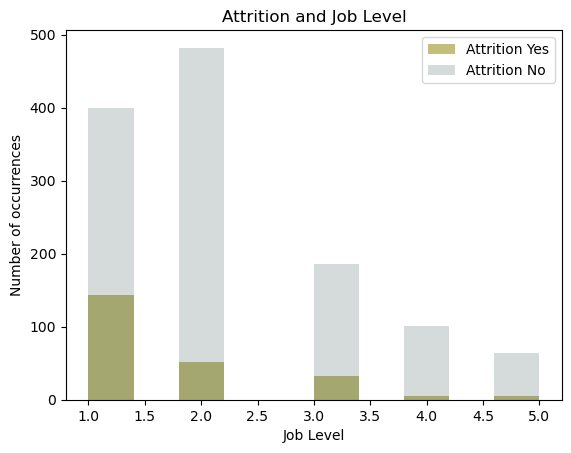

DescribeResult(nobs=237, minmax=(1, 5), mean=1.6371308016877637, variance=0.884717156547236, skewness=1.5441663591437147, kurtosis=2.056865583726977)


Ttest_indResult(statistic=-6.573837830953691, pvalue=6.795384780015255e-11)

In [37]:
# Assuming you have a DataFrame named attrition_yes and attrition_no
# Customize the colors 
color_yes = 'DarkKhaki'
color_no = 'DarkSlateGrey'

# Plot histogram with different colors
plt.hist(attrition_yes['JobLevel'], alpha=0.9, label="Attrition Yes", color=color_yes)
plt.hist(attrition_no['JobLevel'], alpha=0.2, label="Attrition No", color=color_no)

plt.legend(loc="upper right")
plt.title("Attrition and Job Level")
plt.xlabel("Job Level")
plt.ylabel("Number of occurrences")

# Show the plot
plt.show()

# Descriptive statistics and T-test
print(stats.describe(attrition_yes['JobLevel']))
stats.ttest_ind(attrition_yes['JobLevel'], attrition_no['JobLevel'])

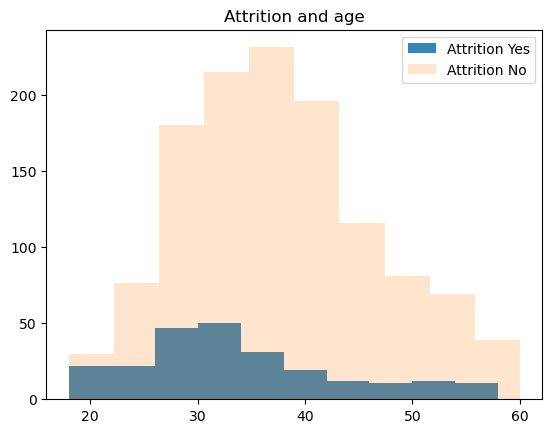

DescribeResult(nobs=237, minmax=(18, 58), mean=33.607594936708864, variance=93.88350139455052, skewness=0.7111944489883134, kurtosis=-0.08105741100884689)


Ttest_indResult(statistic=-6.178663835307217, pvalue=8.356308021103587e-10)

In [38]:
plt.hist(attrition_yes['Age'], alpha = .9, label = "Attrition Yes")
plt.hist(attrition_no ['Age'], alpha = .2, label = "Attrition No")
plt.legend(loc="upper right")
plt.title("Attrition and age")
plt.show()

print(stats.describe(attrition_yes['Age']))
stats.ttest_ind(attrition_yes['Age'], attrition_no['Age'])

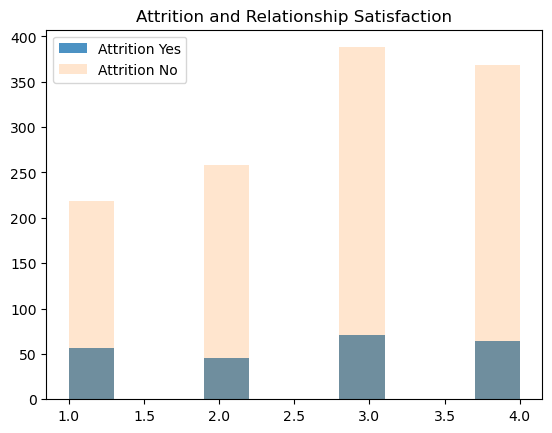

In [39]:
plt.hist(attrition_yes['RelationshipSatisfaction'], alpha = .8, label = "Attrition Yes")
plt.hist(attrition_no ['RelationshipSatisfaction'], alpha = .2, label = "Attrition No")
plt.legend(loc="upper left")
plt.title("Attrition and Relationship Satisfaction")
plt.show()



In [40]:
print(stats.describe(attrition_yes['RelationshipSatisfaction']))
stats.ttest_ind(attrition_yes['RelationshipSatisfaction'], attrition_no['RelationshipSatisfaction'])

DescribeResult(nobs=237, minmax=(1, 4), mean=2.5991561181434597, variance=1.2666094543374098, skewness=-0.18550580133600364, kurtosis=-1.3373284097816516)


Ttest_indResult(statistic=-1.7594250082285654, pvalue=0.07871363048465838)

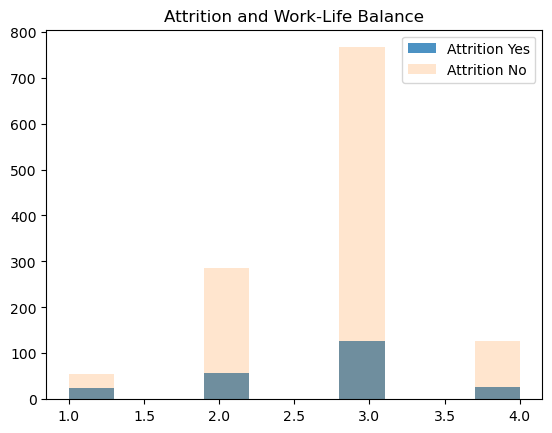

DescribeResult(nobs=237, minmax=(1, 4), mean=2.6582278481012658, variance=0.6665951512550955, skewness=-0.46999525175732554, kurtosis=-0.23091544793990204)


Ttest_indResult(statistic=-2.4548148934297767, pvalue=0.014211054989021308)

In [41]:
plt.hist(attrition_yes['WorkLifeBalance'], alpha = .8, label = "Attrition Yes")
plt.hist(attrition_no ['WorkLifeBalance'], alpha = .2, label = "Attrition No")
plt.legend(loc="upper right")
plt.title("Attrition and Work-Life Balance")
plt.show()

print(stats.describe(attrition_yes['WorkLifeBalance']))
stats.ttest_ind(attrition_yes['WorkLifeBalance'], attrition_no['WorkLifeBalance'])

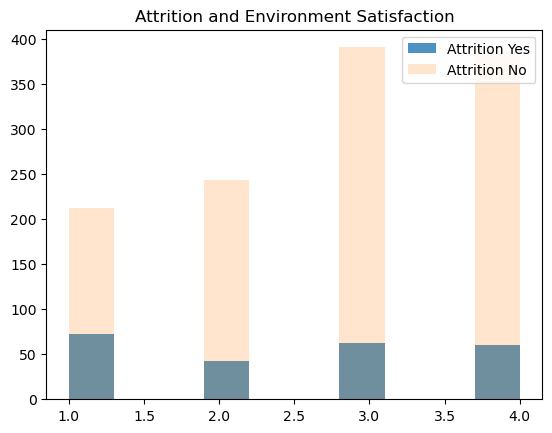

DescribeResult(nobs=237, minmax=(1, 4), mean=2.4641350210970465, variance=1.3684116427090036, skewness=-0.008930974107606958, kurtosis=-1.473297086300014)


Ttest_indResult(statistic=-3.9818600026818496, pvalue=7.17233854936886e-05)

In [42]:
plt.hist(attrition_yes['EnvironmentSatisfaction'], alpha = .8, label = "Attrition Yes")
plt.hist(attrition_no ['EnvironmentSatisfaction'], alpha = .2, label = "Attrition No")
plt.legend(loc="upper right")
plt.title("Attrition and Environment Satisfaction")
plt.show()

print(stats.describe(attrition_yes['EnvironmentSatisfaction']))
stats.ttest_ind(attrition_yes['EnvironmentSatisfaction'], attrition_no['EnvironmentSatisfaction'])

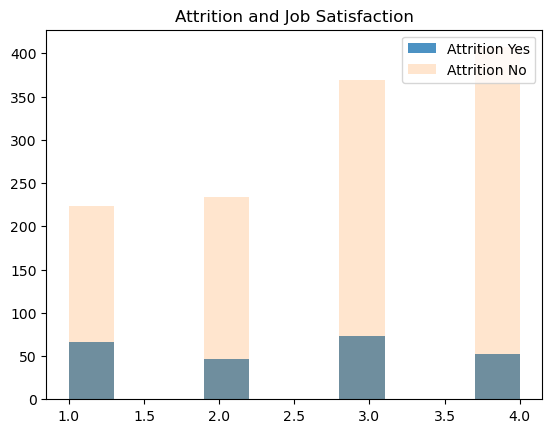

DescribeResult(nobs=237, minmax=(1, 4), mean=2.4683544303797467, variance=1.2500536365586783, skewness=-0.04818537452982892, kurtosis=-1.3633166232436447)


Ttest_indResult(statistic=-3.9862267630568273, pvalue=7.043066741731151e-05)

In [43]:
plt.hist(attrition_yes['JobSatisfaction'], alpha = .8, label = "Attrition Yes")
plt.hist(attrition_no ['JobSatisfaction'], alpha = .2, label = "Attrition No")
plt.legend(loc="upper right")
plt.title("Attrition and Job Satisfaction")
plt.show()

print(stats.describe(attrition_yes['JobSatisfaction']))
stats.ttest_ind(attrition_yes['JobSatisfaction'], attrition_no['JobSatisfaction'])

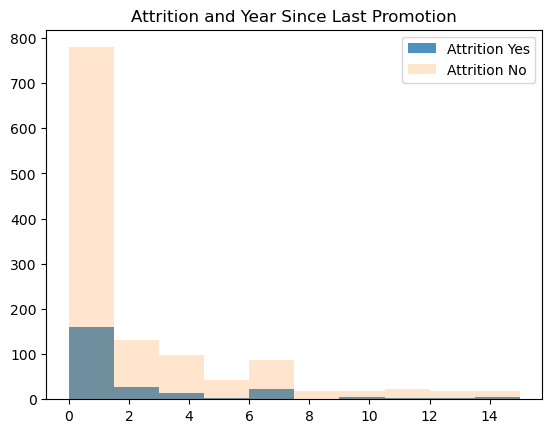

DescribeResult(nobs=237, minmax=(0, 15), mean=1.9451476793248945, variance=9.941893728098409, skewness=2.2035028522576687, kurtosis=4.733982409395015)


Ttest_indResult(statistic=-1.2657876620135298, pvalue=0.2057899591624936)

In [44]:
plt.hist(attrition_yes['YearsSinceLastPromotion'], alpha = .8, label = "Attrition Yes")
plt.hist(attrition_no ['YearsSinceLastPromotion'], alpha = .2, label = "Attrition No")
plt.legend(loc="upper right")
plt.title("Attrition and Year Since Last Promotion")
plt.show()

print(stats.describe(attrition_yes['YearsSinceLastPromotion']))
stats.ttest_ind(attrition_yes['YearsSinceLastPromotion'], attrition_no['YearsSinceLastPromotion'])


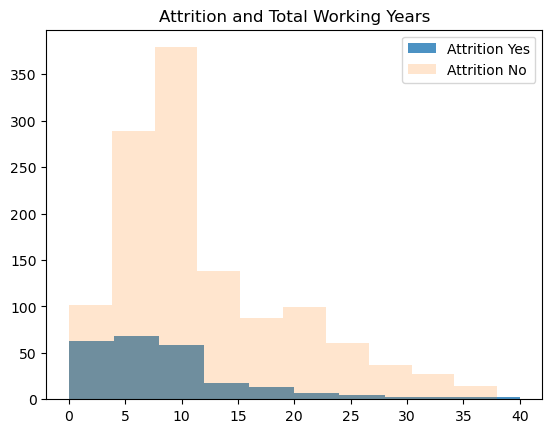

DescribeResult(nobs=237, minmax=(0, 40), mean=8.244725738396625, variance=51.39748265751269, skewness=1.6774541418299111, kurtosis=3.6795251873459547)


Ttest_indResult(statistic=-6.6522546135024445, pvalue=4.0618781112668525e-11)

In [45]:
plt.hist(attrition_yes['TotalWorkingYears'], alpha = .8, label = "Attrition Yes")
plt.hist(attrition_no ['TotalWorkingYears'], alpha = .2, label = "Attrition No")
plt.legend(loc="upper right")
plt.title("Attrition and Total Working Years")
plt.show()

print(stats.describe(attrition_yes['TotalWorkingYears']))
stats.ttest_ind(attrition_yes['TotalWorkingYears'], attrition_no['TotalWorkingYears'])

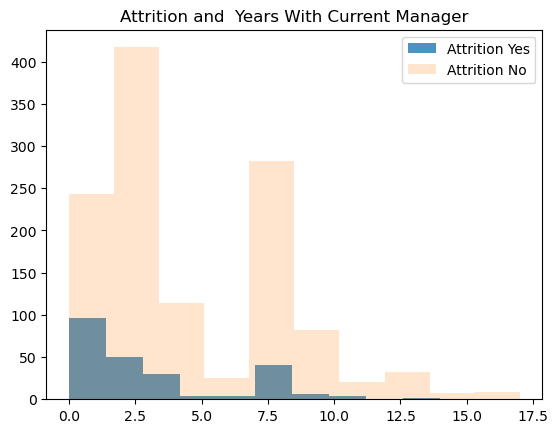

DescribeResult(nobs=237, minmax=(0, 14), mean=2.852320675105485, variance=9.880640778087677, skewness=1.023320759479468, kurtosis=0.23279109269727938)


Ttest_indResult(statistic=-6.059068531868998, pvalue=1.7369867845242207e-09)

In [46]:
plt.hist(attrition_yes['YearsWithCurrManager'], alpha = .8, label = "Attrition Yes")
plt.hist(attrition_no ['YearsWithCurrManager'], alpha = .2, label = "Attrition No")
plt.legend(loc="upper right")
plt.title("Attrition and  Years With Current Manager")
plt.show() 

print(stats.describe(attrition_yes['YearsWithCurrManager']))
stats.ttest_ind(attrition_yes['YearsWithCurrManager'], attrition_no['YearsWithCurrManager'])

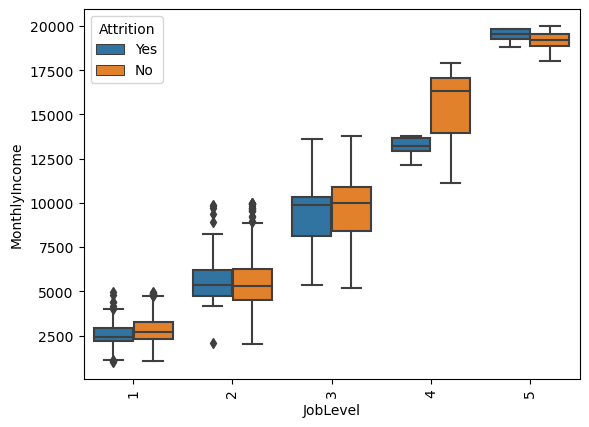

In [47]:
ax= sns.boxplot(y='MonthlyIncome',hue='Attrition',x='JobLevel',data=IBM_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

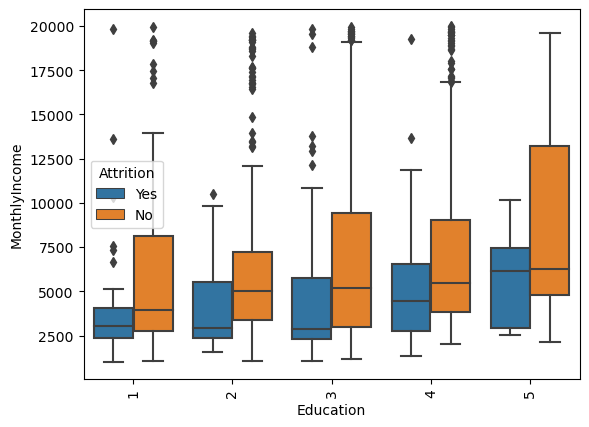

In [48]:
ax= sns.boxplot(y='MonthlyIncome',hue='Attrition',x='Education',data=IBM_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

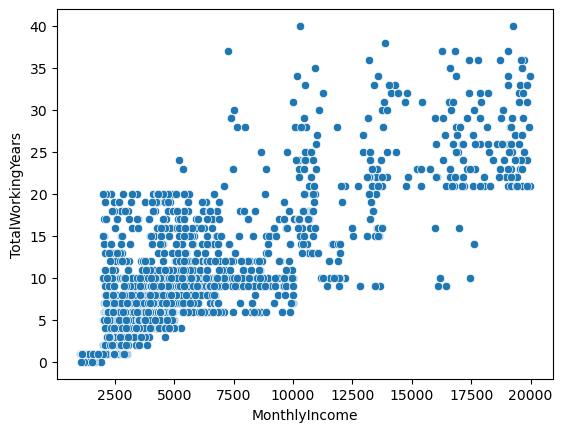

In [49]:
 sns.scatterplot(x="MonthlyIncome", y="TotalWorkingYears", data=IBM_df);

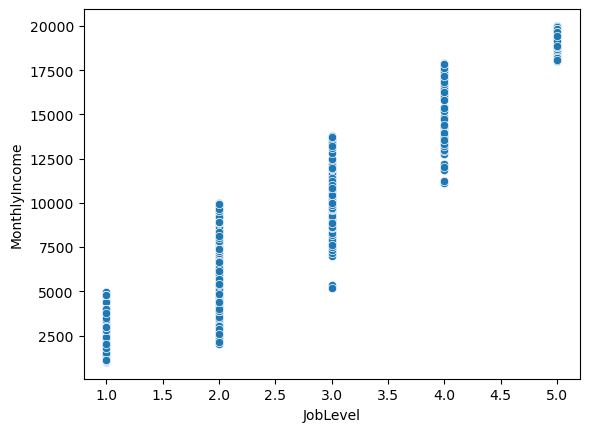

In [50]:
 sns.scatterplot(x="JobLevel", y="MonthlyIncome", data=IBM_df);

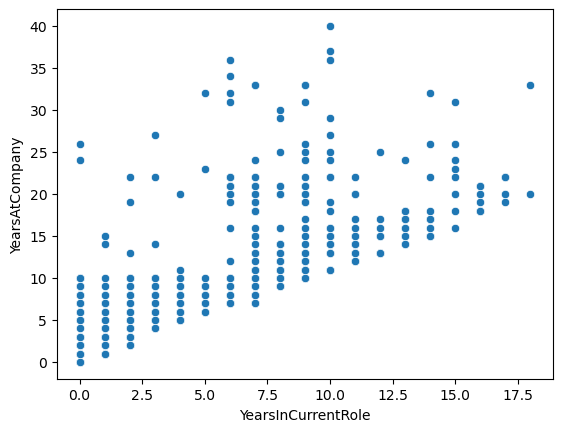

In [51]:
sns.scatterplot(x="YearsInCurrentRole", y="YearsAtCompany", data=IBM_df);

<Axes: >

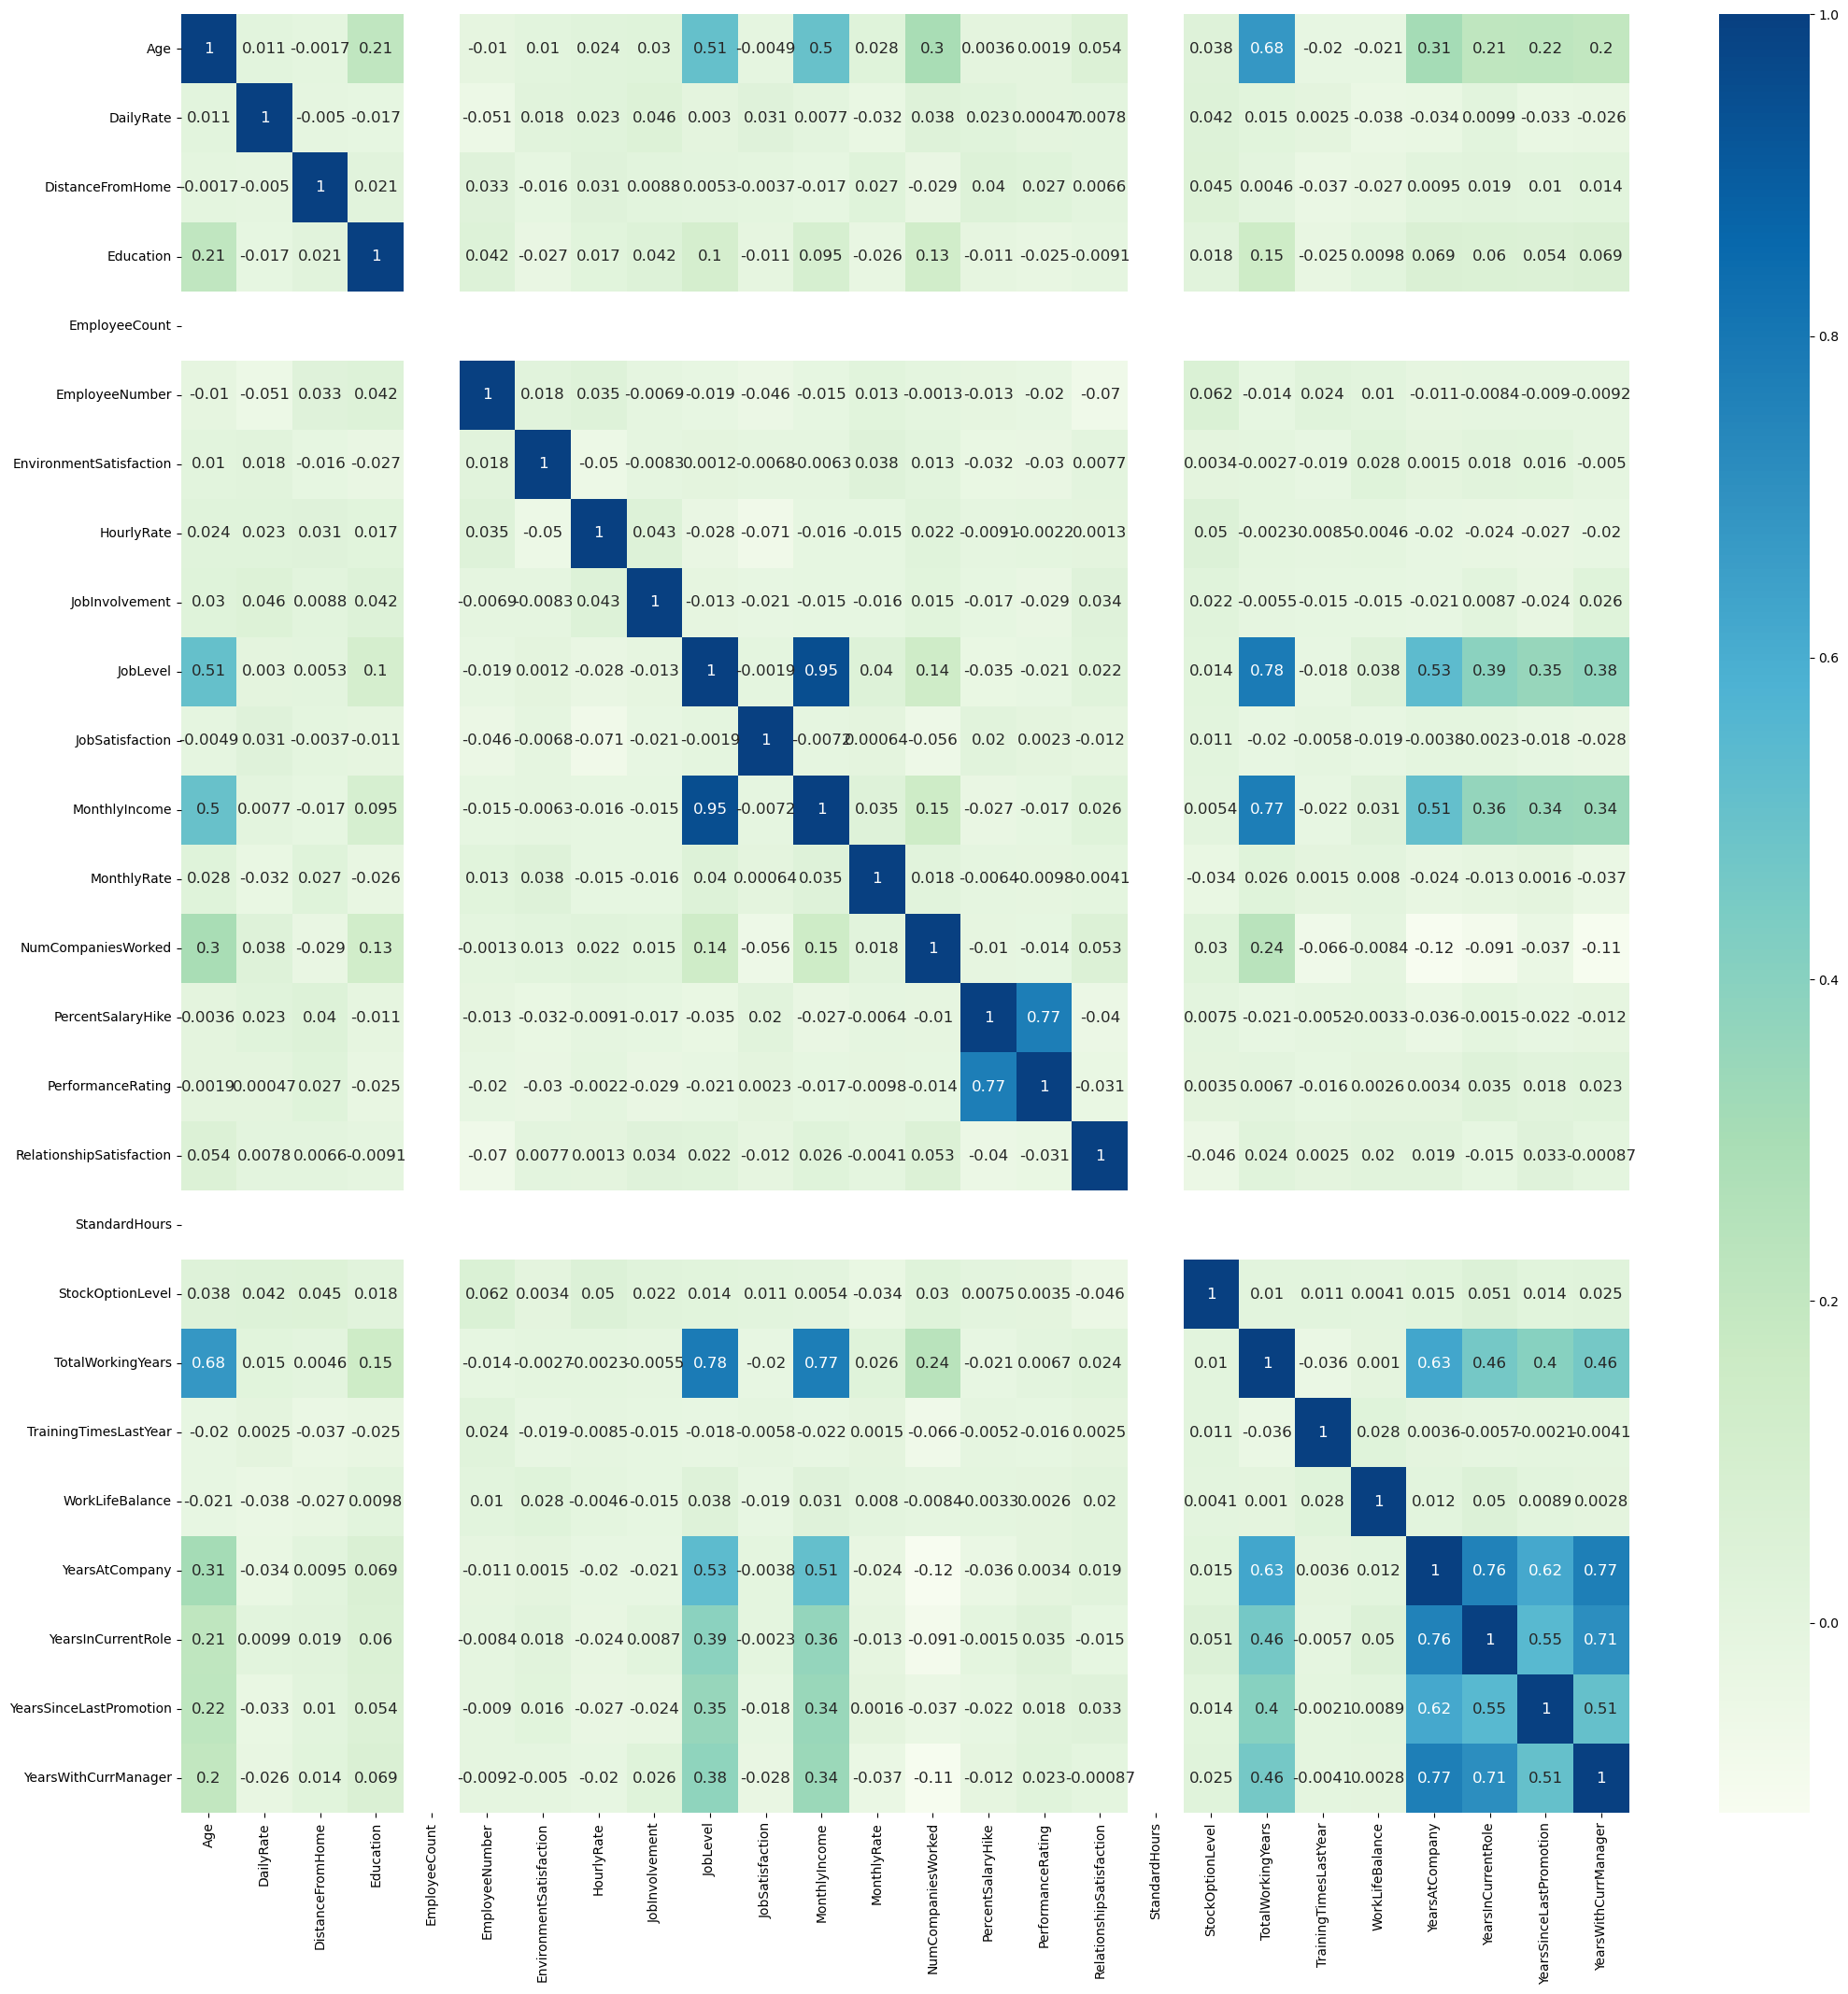

In [53]:
plt.figure(figsize=(25,25))
sns.heatmap(IBM_df.corr(), annot=True,annot_kws={"fontsize":12},cmap="GnBu")


In [54]:
# results

# For those people who leave the company, the mean distance from home is 10.6 miles. 
# People who are 33 years old left the company more than people in their low 20s or 40 years old and older. 
# Individuals who worked around 8 years in the company left more than those who worked over 12 years in the company.
# Most people who left had about three years with their current manager, and had been promoted within the last two years.   

In [55]:
# Insights

# Sales Representatives are more likely to leave IBM than any other department. 
# There are many sales representatives who report a low relationship satisfaction.
# People tend to leave IBM in search for a higher income and job level.
# People tend to stay at IBM if environmental and Job satisfaction, and work-life balance is high.


In [56]:
#Conclusion/recommendations

# This analysis rejects the null hypothesis and accepts the alternate hypothesis; There is a statistical significance
# between employee well-being measurements and employee attrition. 
# IBM attrition levels will be better if a path to higher Job Level and salary is provided, especially for 
# sales representatives. 
# Exit interviews can be used to understand the low environmental satisfaction for sales representatives.
# Maintaining a high satisfaction levels and work-life balance for current employees will reduce turnover. 


